# **YouTube (U.S.) Data**: [Trending YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv)

# Goal
In this notebook, YouTube videos in the United States will be analyzed based on attributes and metrics.  The goal is to draw conclusions about the model of a popular video.
# Rationalization
The rationalization behind this project is to model the average viral/hot/popular video.  This will help one understand what makes a popular video and possibly determine its worth through social feedback.


# **Welcome to the Jungle: Pandas and Pythons**

Using Pandas and Python, we can import our .csv file using a clean, pythonic one-liner.

In [ ]:
import pandas as pd

df = pd.read_csv("USvideos.csv", encoding='utf-8')

# Attributes and Types with **DataFrame.dtypes**
We have the following attributes available for our subjects:

In [ ]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In terms of data type, we are currently left in the dark on most attributes.  Fortunately, we have most numerical data represented in float64.  Also, we have a few boolean values that can be useful for filtration.  This makes the quantitative and sorting aspects nice and easy.


# Previewing Data with **DataFrame.*head()***

We take a peek at our dataset by printing **DataFrame.*head()***.  This function returns a preview of the dataset and takes *n* rows as an argument.  By leaving out the argument, *n* will default to *n=5*.  

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Describing the Data with **DataFrame.*describe()***

By calling **DataFrame*.describe()***, we can generate statistics for our dataset:

In [ ]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


Above, we can observe the magic of Python and Pandas already.  However, there are a few things we need to be cognizant of...  Namely, intrinsic value and permutative importance.

**Case Study: *category_id***

> We don't need most statistics for *category_id* because it is arbitrarily numbered.  A "low" or "high" *category_id* has no assigned value; it is merely a unique, numeric category identifier.  We can't sort them, and there is no ranking order.  We don't care if something is in the top 25th percentile of *category_id*.  We don't care about the mean, median, or mode for *category_id*.  Always use pragmatic logic when analyzing data.



# Building Our Data with **df['columns']**

We can build onto our dataframe by adding columns of our own creation.  This is useful because it allows us to pre-calculate new attributes for easier access.  One way we can make a column is by combining the data from two other columns into one new value.  

For example, we have the 'likes' value and 'dislikes' value.  We can add the 'likes' and 'dislikes' for each video and obtain a 'reactions' value.  

> *In essence, 'reactions' is the total number of users who had a resounding opinion of the video- be it positive or negative.*

Unfortunately, our **type object** curse has come into play.  Traditionally, we would create a new column like so:





In [ ]:

# df['new_column_name'] = df['some_column'] + ' ' + df['another_column']
df['reactions'] = df['likes'] + ' ' + df['dislikes']


ValueError: ignored

However, by running that code, you'll encounter this error:

> **ValueError:** NumExpr 2 does not support Unicode as a dtype.

That's because YouTubers fill their video titles and descriptions with Unicode characters, such as Emojis. 😬

To skirt around this issue, we can make Pandas evaluate the result using **Pandas**.***eval()***, then explicitly declare 'python' as the engine used to parse the expression (as opposed to the default, which is obviously 'numexpr').

# Adding Columns with **Pandas.*eval()***

In [ ]:
df["reactions"] = pd.eval('df["likes"] + df["dislikes"]', engine='python')
df["reactions"]

0         60493
1        103331
2        151372
3         10838
4        134224
          ...  
40944     39545
40945     60390
40946     49100
40947    195803
40948    570055
Name: reactions, Length: 40949, dtype: int64

Because we are using a different parsing engine that is adapting to new characters, we can check our work.  The result for each entry should be the result of adding the original values.

In [ ]:
print(df["likes"])
# 0         57527
# ...

print(df["dislikes"])
# 0          2966
# ...

# 57527 + 2966 = 60493


0         57527
1         97185
2        146033
3         10172
4        132235
          ...  
40944     38160
40945     60008
40946     48068
40947    192957
40948    357079
Name: likes, Length: 40949, dtype: int64
0          2966
1          6146
2          5339
3           666
4          1989
          ...  
40944      1385
40945       382
40946      1032
40947      2846
40948    212976
Name: dislikes, Length: 40949, dtype: int64


# Filtering Data with **Pandas.*to_numeric()***

We can filter data entries by only showing rows that meet a specific requirement.  The 'errors' argument has three options; coerce, raise, and ignore.  Coerce will fill the missing data with NaN, raise will raise an error, and ignore will simply skip the troublesome row.

Below, we will find all entries with 125 million views or more:

In [ ]:
num_views = pd.to_numeric(df.views, errors='coerce')
# show channel title of: videos with 125 million views or more
top_us = df[num_views > 125000000]
top_us


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,reactions
5699,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4457717
5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4616854
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4736603
34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,3223523
34888,zEf423kYfqk,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,1545294
35057,VYOjWnS4cMY,18.16.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995,377394,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,3793450
35265,VYOjWnS4cMY,18.17.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641,398351,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,3976451
35474,VYOjWnS4cMY,18.18.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",142421830,3885070,241386,414109,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4126456
35675,VYOjWnS4cMY,18.19.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",149830680,4002473,252365,426810,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4254838
35878,VYOjWnS4cMY,18.20.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",156612892,4110879,261521,437053,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4372400


# Indexing Data with **DataFrame.*set_index()***

We can choose an attribute to index the dataframe by for easier reading.  Here, we will do it by title:

In [ ]:
top_us.set_index(['title'])

,video_id,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,reactions
title,,,,,,,,,,,,,,,,
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,FlsCjmMhFmw,17.12.12,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4457717
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,FlsCjmMhFmw,17.13.12,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4616854
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,FlsCjmMhFmw,17.14.12,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4736603
Ariana Grande - No Tears Left To Cry,ffxKSjUwKdU,18.14.05,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,3223523
"Becky G, Natti Natasha - Sin Pijama (Official Video)",zEf423kYfqk,18.15.05,BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,1545294
Childish Gambino - This Is America (Official Video),VYOjWnS4cMY,18.16.05,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995,377394,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,3793450
Childish Gambino - This Is America (Official Video),VYOjWnS4cMY,18.17.05,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641,398351,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,3976451
Childish Gambino - This Is America (Official Video),VYOjWnS4cMY,18.18.05,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",142421830,3885070,241386,414109,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4126456
Childish Gambino - This Is America (Official Video),VYOjWnS4cMY,18.19.05,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",149830680,4002473,252365,426810,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4254838


# Exporting Data with **DataFrame.*to_csv()***

Finally, we can export our results to a trimmed and filtered file.  

We can re-read the file to ensure it saved correctly.


# **Conclusion:**
> Our results show that Childish Gambino, Ariana Grande, Becky G, and YouTube Rewind 2017 are among the most viewed videos.
>
# **Analysis:**
> It should be no suprise that pop culture is the most popular content on an entertainment platform.

In [ ]:
top_us.to_csv("YTbestUS.csv")
top_us_csv = pd.read_csv("YTbestUS.csv")
top_us_csv

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,reactions
0,5699,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4457717
1,5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4616854
2,6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4736603
3,34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,3223523
4,34888,zEf423kYfqk,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,1545294
5,35057,VYOjWnS4cMY,18.16.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995,377394,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,3793450
6,35265,VYOjWnS4cMY,18.17.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641,398351,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,3976451
7,35474,VYOjWnS4cMY,18.18.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",142421830,3885070,241386,414109,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4126456
8,35675,VYOjWnS4cMY,18.19.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",149830680,4002473,252365,426810,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4254838
9,35878,VYOjWnS4cMY,18.20.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",156612892,4110879,261521,437053,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4372400


# Finding Null Values with **DataFrame*.isna()***

There are times where we need to be sure that our data set is complete.  Pandas has a built-in feature for checking the integrity of your dataset to adress missing data.  While this doesn't check for data flaws (like dirty data), it does ensure you don't have missing data points.  It will adress None or numpy.NaN (Not a Number) values.  Values of these types will return True.

In [ ]:
missingpoints = top_us_csv.isna()
missingpoints

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,reactions
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Calling the ***.sum()*** function to count missing values  

Calling it once will give you the sum for each category, and twice will give you the total:

In [ ]:
missingnum = missingpoints.isna().sum().sum()
missingnum

0

# Dropping null values with ***.dropna()***:

Here, we will drop the null values so that we can analyze our data properly.  The result is a new DataFrame.

In [ ]:
verified_data = top_us_csv.dropna()
verified_data

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,reactions
0,5699,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4457717
1,5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4616854
2,6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4736603
3,34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,3223523
4,34888,zEf423kYfqk,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,1545294
5,35057,VYOjWnS4cMY,18.16.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995,377394,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,3793450
6,35265,VYOjWnS4cMY,18.17.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641,398351,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,3976451
7,35474,VYOjWnS4cMY,18.18.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",142421830,3885070,241386,414109,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4126456
8,35675,VYOjWnS4cMY,18.19.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",149830680,4002473,252365,426810,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4254838
9,35878,VYOjWnS4cMY,18.20.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",156612892,4110879,261521,437053,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4372400


# Filling missing values with ***.fillna()***

We can fill missing data with some sentinel value.  Here we'll use 0, as we are about to be doing some numerical data graphing.

In [ ]:
fixed_data = top_us_csv.fillna(value=0)
fixed_data

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,reactions
0,5699,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",125432237,2912702,1545015,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4457717
1,5935,FlsCjmMhFmw,17.13.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",137843120,3014471,1602383,817582,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4616854
2,6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",4736603
3,34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,https://i.ytimg.com/vi/ffxKSjUwKdU/default.jpg,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,3223523
4,34888,zEf423kYfqk,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,https://i.ytimg.com/vi/zEf423kYfqk/default.jpg,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,1545294
5,35057,VYOjWnS4cMY,18.16.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995,377394,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,3793450
6,35265,VYOjWnS4cMY,18.17.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641,398351,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,3976451
7,35474,VYOjWnS4cMY,18.18.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",142421830,3885070,241386,414109,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4126456
8,35675,VYOjWnS4cMY,18.19.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",149830680,4002473,252365,426810,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4254838
9,35878,VYOjWnS4cMY,18.20.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",156612892,4110879,261521,437053,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,4372400


# Using matplotlib to make some ***.hist()***ograms

It's quite simple:

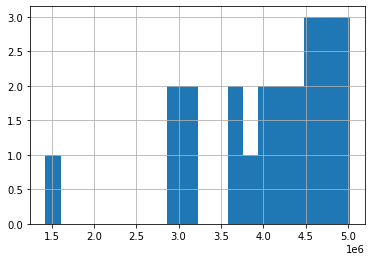

In [ ]:
likes_show = top_us_csv['likes'].hist(bins = 20)
likes_show

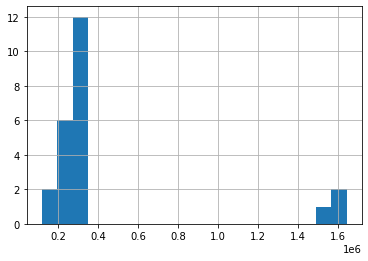

In [ ]:
dislikes_show = top_us_csv['dislikes'].hist(bins=20)
dislikes_show

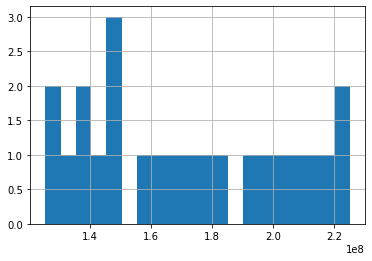

In [ ]:
views_show = top_us_csv['views'].hist(bins=20)
views_show

# Making 3 ***.hist()***ograms on the same image:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10432e59d0>],
      dtype=object)

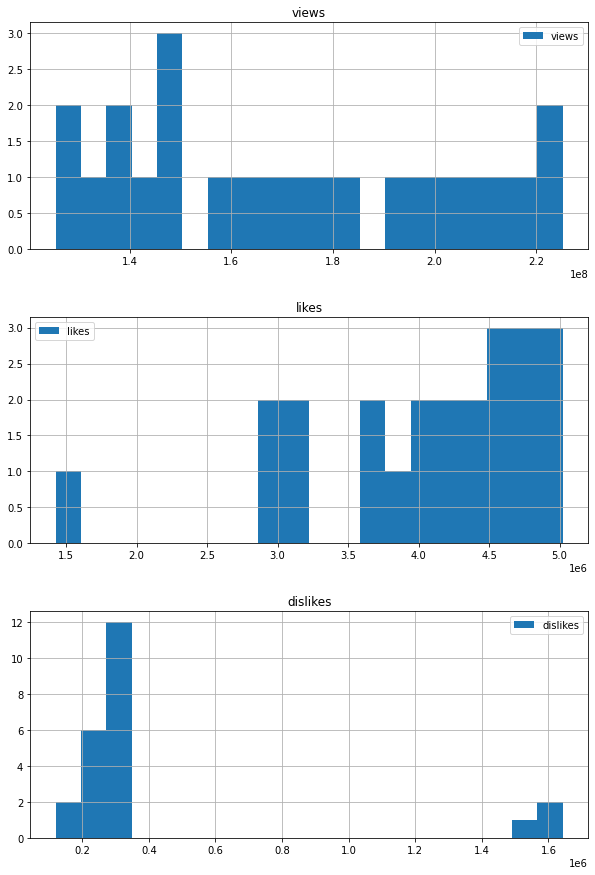

In [ ]:
trio = top_us_csv.hist(column=['views', 'likes','dislikes'], bins=20,
                    legend=True, figsize=(10, 15), layout=(3, 1))
trio

# Creating a **matplotlib.pyplot.*line()*** trendline

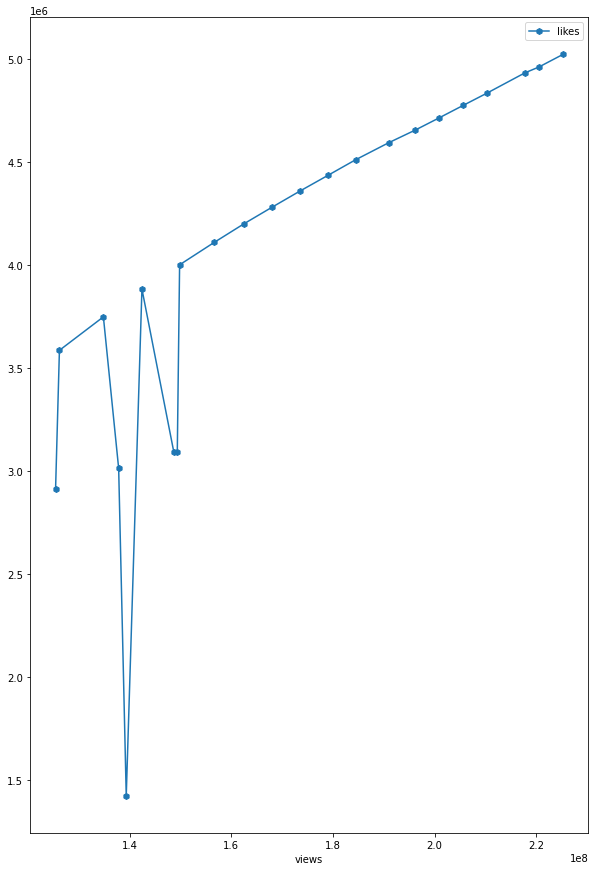

In [ ]:
import matplotlib.pyplot as plt

line = top_us_csv.sort_values(by='views', ascending=True)
graph = line.plot.line(x='views', y='likes', figsize=(10, 15), marker = 'h')
graph

# Adding Multiple Trendlines

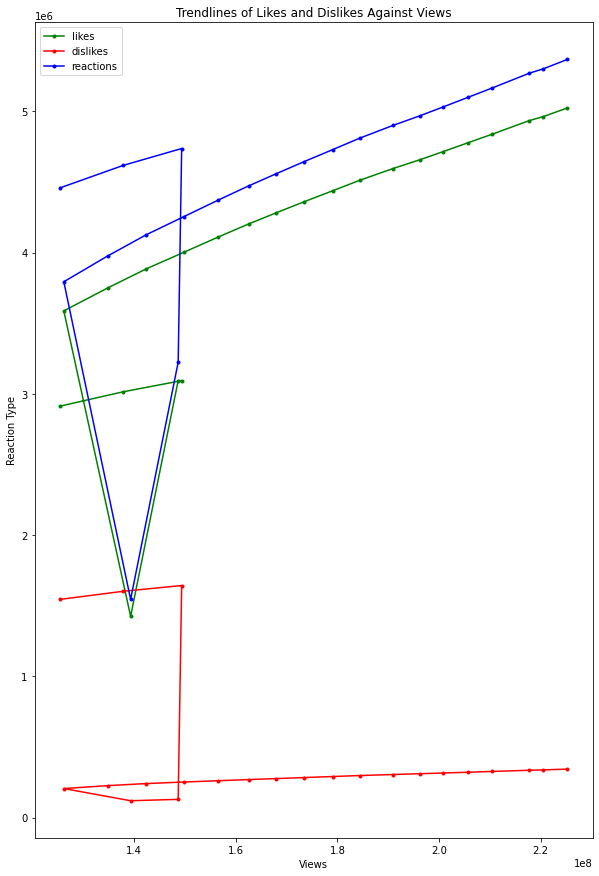

In [ ]:
plt.figure(figsize=(10, 15))
plt.title('Trendlines of Likes and Dislikes Against Views')
plt.plot(top_us_csv['views'], top_us_csv['likes'], 'g.-', label='likes')
plt.plot(top_us_csv['views'], top_us_csv['dislikes'], 'r.-', label='dislikes')
plt.plot(top_us_csv['views'], top_us_csv['reactions'], 'b.-', label='reactions')
plt.xlabel('Views')
plt.ylabel('Reaction Type')
plt.legend()
plt.show()
show = plt.show()
show

# Visualizing Data with a Bar Plot and Saving Your Sweet Data

We should have condensed the 'This is America' results into one.  I assume the most accurate would be the last read value and that the values shouldn't be added together.  Nevertheless, the most popular American video on YT was the music video for 'This is America'!

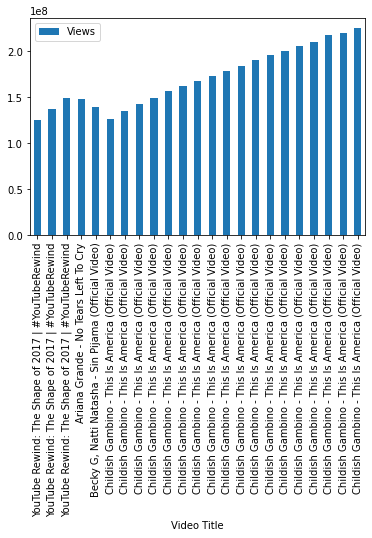

In [ ]:
bar = pd.DataFrame()
bar['Video Title'] = top_us_csv['title']
bar['Views'] = top_us_csv['views']
bar.set_index('Views')
bar.plot.bar('Video Title', 'Views')
bar

plt.savefig('bar.png')

# Reading a Bar Plot **.PNG**

[]

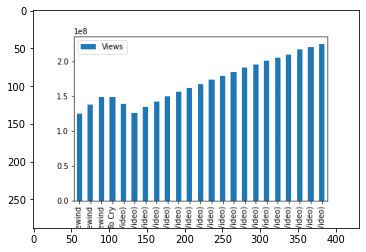

In [ ]:

import matplotlib.image as mimg
img = mimg.imread(r'bar.png')
img_show = plt.imshow(img)
plt.plot()

# **Stage 4**
# Addressing Repeated Values with .set_index()

We can compare and observe analytics by finding subsets of sets within our data.  For example, we have video categories.  We can find out which categories are more controversial by observing how many videos in that category have disabled comments.

In [ ]:
video_index = pd.read_csv("USvideos.csv", encoding='utf-8')
video_index.set_index(['category_id', 'comments_disabled'], inplace=True)
video_index.sort_index(axis=1)
video_index.drop_duplicates(inplace=True)
video_index.index

MultiIndex([(22, False),
            (24, False),
            (23, False),
            (24, False),
            (24, False),
            (28, False),
            (24, False),
            (28, False),
            ( 1, False),
            (25, False),
            ...
            (10, False),
            (24, False),
            (10, False),
            (10, False),
            (22, False),
            (15, False),
            (22, False),
            (24, False),
            ( 1, False),
            (20, False)],
           names=['category_id', 'comments_disabled'], length=40901)

# Viewing data appropriately with ***.unstack()*** and ***.sum()***

We can use unstack to process data based on parameters such as columns.  We can also use summary statistics, such as sum, in conjunction with this.

In [ ]:
video_index.groupby(by=['category_id', 'comments_disabled']).dislikes.sum().unstack

<bound method Series.unstack of category_id  comments_disabled
1            False                 5981468
             True                    89778
2            False                  242940
             True                       70
10           False                51170573
             True                     2791
15           False                  526839
             True                      540
17           False                 5108144
             True                    24577
19           False                  340090
20           False                 9146306
             True                    15355
22           False                 9720461
             True                   458403
23           False                 7219908
             True                       78
24           False                42622089
             True                   282514
25           False                 4012800
             True                   166691
26           False                

For reference:

2 - Autos & Vehicles

1 -  Film & Animation

10 - Music

15 - Pets & Animals

17 - Sports

18 - Short Movies

19 - Travel & Events

20 - Gaming

21 - Videoblogging

22 - People & Blogs

23 - Comedy

24 - Entertainment

25 - News & Politics

26 - Howto & Style

27 - Education

28 - Science & Technology

29 - Nonprofits & Activism

30 - Movies

31 - Anime/Animation

32 - Action/Adventure

33 - Classics

34 - Comedy

35 - Documentary

36 - Drama

37 - Family

38 - Foreign

39 - Horror

40 - Sci-Fi/Fantasy

41 - Thriller

42 - Shorts

43 - Shows

44 - Trailers

Entertainment has the most disabled comments by far.  There are some discrepencies we'd have to consider, such as videos that are made for kids may have comments disabled.  Additionally, the creator may not want to see negative feedback, so they could have disabled comments for that purpose.

So how do we sift through those and find only the negative comments_disabled videos?

# Indexing and Using **Summary Stats** and **Pivot Tables**

Instead of eyeballing the results, we can use summary statistics to get a more clear view of the results.  We can see that Science and Technology in fact has some of the most videos with disabled comments.

Additionally, we can achieve similar results using pivot tables.

In [ ]:
video_index.groupby(by=['category_id', 'comments_disabled']).sum().reset_index().pivot(index='category_id', columns='comments_disabled').dislikes

comments_disabled,False,True
category_id,,
1,5981468.0,89778.0
2,242940.0,70.0
10,51170573.0,2791.0
15,526839.0,540.0
17,5108144.0,24577.0
19,340090.0,NaN
20,9146306.0,15355.0
22,9720461.0,458403.0
23,7219908.0,78.0


The resulting output is a sum of all dislikes, indexed and sorted by comments_disabled within categories.  That shows us all the **B A D** videos!



# Hierarchy Indexing using .groupby() and summary statistics

In [ ]:
video_index = pd.read_csv('USvideos.csv', encoding='UTF-8')
video_index.groupby('category_id').mean().unstack()

                        category_id
views                   1              3.106250e+06
                        2              1.355965e+06
                        10             6.201003e+06
                        15             8.311435e+05
                        17             2.025969e+06
                                           ...     
video_error_or_removed  26             0.000000e+00
                        27             0.000000e+00
                        28             0.000000e+00
                        29             0.000000e+00
                        43             0.000000e+00
Length: 112, dtype: float64

By calling this pythonic line, we can have hierarchical indexing applied by some index, such as category_id.  Here, we have the average views by category displayed.  It also followed with video_error_or_removed, but it returned nothing for many categories.

# Using Merge and Concat (with a Fresh Import)

Let's move on to merge and concat.  First, we'll reread our csv.  This also offers a new place to read the csv so you don't have to go back to the top of the page every time.  Notice we're still reading as UTF-8 to get around the emoji issue.

In [ ]:
import pandas as pd
csv = pd.read_csv('USvideos.csv', encoding='UTF-8')
# csv

Here, we will create subsets of our data frame.  One uses the title, channel_title, and likes columns.  Two uses the video_id, channel_title, and dislikes columns.

You'll see that this shares channel_title.  The title and video_id, in ***most*** cases, will be synonymous as a unique identifier.  Then, the likes and dislikes are used as different values.  We'll see how using the SQL lingo effects this.

First, we'll use an outer join.  Additionally, we'll delete some entries from sub2 (keeping anything where dislikes are less than or equal to 5k).

In [ ]:
sub1 = pd.DataFrame()
sub2 = pd.DataFrame()

sub1 = csv.loc[:, ['title', 'channel_title', 'likes']]
sub2 = csv.loc[:, ['video_id', 'channel_title', 'dislikes']]
sub2 = sub2.loc[sub2['dislikes'] <= 5000]
sub1

,title,channel_title,likes
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527
1,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,97185
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,146033
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,10172
4,I Dare You: GOING BALD!?,nigahiga,132235
...,...,...,...
40944,The Cat Who Caught the Laser,AaronsAnimals,38160
40945,True Facts : Ant Mutualism,zefrank1,60008
40946,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,48068
40947,How Black Panther Should Have Ended,How It Should Have Ended,192957


We have 40,949 rows.

In [ ]:
sub2

,video_id,channel_title,dislikes
0,2kyS6SvSYSE,CaseyNeistat,2966
3,puqaWrEC7tY,Good Mythical Morning,666
4,d380meD0W0M,nigahiga,1989
5,gHZ1Qz0KiKM,iJustine,511
6,39idVpFF7NQ,Saturday Night Live,2445
...,...,...,...
40943,1PhPYr_9zRY,BuzzFeed Celeb,4052
40944,BZt0qjTWNhw,AaronsAnimals,1385
40945,1h7KV2sjUWY,zefrank1,382
40946,D6Oy4LfoqsU,Brad Mondo,1032


We have 36,078 rows.

In [ ]:
pd.concat([sub1, sub2], join='inner', axis=1)

,title,channel_title,likes,video_id,channel_title,dislikes
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,2kyS6SvSYSE,CaseyNeistat,2966
3,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,10172,puqaWrEC7tY,Good Mythical Morning,666
4,I Dare You: GOING BALD!?,nigahiga,132235,d380meD0W0M,nigahiga,1989
5,2 Weeks with iPhone X,iJustine,9763,gHZ1Qz0KiKM,iJustine,511
6,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,15993,39idVpFF7NQ,Saturday Night Live,2445
...,...,...,...,...,...,...
40943,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,645888,1PhPYr_9zRY,BuzzFeed Celeb,4052
40944,The Cat Who Caught the Laser,AaronsAnimals,38160,BZt0qjTWNhw,AaronsAnimals,1385
40945,True Facts : Ant Mutualism,zefrank1,60008,1h7KV2sjUWY,zefrank1,382
40946,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,48068,D6Oy4LfoqsU,Brad Mondo,1032


We are back to 36,078.  That's because we concatenated.  We stacked the data points side by side, using axis=1.  We filled in missing data columns, not rows.  Merge will add more rows, so let's do that.

# Using Merge to Join Subsets

Here, we'll use merge instead of concat.  We have the option 'on' to determine the indexing value.  We also have the 'how' option to determine the SQL lingo method of joining.

In [ ]:
pd.merge(sub1, sub2, on='channel_title', how='outer')


,title,channel_title,likes,video_id,dislikes
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,2kyS6SvSYSE,2966.0
1,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,nMbUA7dghlk,862.0
2,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,nMbUA7dghlk,974.0
3,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,nMbUA7dghlk,1008.0
4,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,nMbUA7dghlk,1039.0
...,...,...,...,...,...
2221859,How Black Panther Should Have Ended,How It Should Have Ended,192957,oV0zkMe1K8s,2846.0
2221860,Assassin's Creed Odyssey: E3 2018 Official Wor...,Ubisoft North America,14059,s_SJZSAtLBA,1133.0
2221861,Assassin's Creed Odyssey: E3 2018 Official Wor...,Ubisoft North America,14059,s_SJZSAtLBA,1642.0
2221862,Assassin's Creed Odyssey: E3 2018 Official Wor...,Ubisoft North America,18188,s_SJZSAtLBA,1133.0


In [ ]:
pd.merge(sub1, sub2, on='channel_title', how='inner')

,title,channel_title,likes,video_id,dislikes
0,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,2kyS6SvSYSE,2966
1,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,nMbUA7dghlk,862
2,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,nMbUA7dghlk,974
3,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,nMbUA7dghlk,1008
4,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,57527,nMbUA7dghlk,1039
...,...,...,...,...,...
2221147,How Black Panther Should Have Ended,How It Should Have Ended,192957,oV0zkMe1K8s,2846
2221148,Assassin's Creed Odyssey: E3 2018 Official Wor...,Ubisoft North America,14059,s_SJZSAtLBA,1133
2221149,Assassin's Creed Odyssey: E3 2018 Official Wor...,Ubisoft North America,14059,s_SJZSAtLBA,1642
2221150,Assassin's Creed Odyssey: E3 2018 Official Wor...,Ubisoft North America,18188,s_SJZSAtLBA,1133


We can see that the inner join method shows less than the outer join, which makes sense.  The inner join takes the boolean intersection- the inside of the vinn diagram.  The outer join takes the union, which is taking all data points.

In [ ]:
import pandas as pd
csv = pd.read_csv('USvideos.csv', encoding='UTF-8')
csv = csv.pivot_table(index=['category_id', 'comments_disabled'], columns='dislikes').sum()

# Using Pivot Table and Crosstab

**Currently, the pivot table is getting an Error that I am trying to work out.**

In [ ]:
import pandas as pd
csv = pd.read_csv('USvideos.csv', encoding='UTF-8')
csv.pivot_table(index=['category_id', 'comments_disabled'], columns='dislikes', aggfunc='sum', margins=True)

KeyboardInterrupt: ignored

Without margins, we can achieve a similar output as the hierarchical index in the beginning of stage 4.

We have an embedded summary function argument with the pivot_table.

In [ ]:
csv.pivot_table(index=['category_id', 'comments_disabled'], columns='dislikes', aggfunc='sum')

comment_count          ...        views            
dislikes                            0       1        ...      1643059     1674420
category_id comments_disabled                        ...                         
1           False                      49.0    26.0  ...          NaN         NaN
            True                        0.0     NaN  ...          NaN         NaN
2           False                    7915.0    22.0  ...          NaN         NaN
            True                        NaN     NaN  ...          NaN         NaN
10          False                   37795.0   168.0  ...          NaN         NaN
            True                        0.0     NaN  ...          NaN         NaN
15          False                      10.0    29.0  ...          NaN         NaN
            True                        NaN     NaN  ...          NaN         NaN
17          False                     242.0    34.0  ...          NaN         NaN
            True                        0.0     NaN  ...          NaN         NaN
19          False                       4.0     0.0  ...          NaN         NaN
20          False                      24.0     NaN  ...          NaN         NaN
            True                        NaN     NaN  ...          NaN         NaN
22          False                   13910.0    48.0  ...          NaN         NaN
            True                        0.0     NaN  ...          NaN         NaN
23          False                      11.0    31.0  ...          NaN         NaN
            True                        NaN     NaN  ...          NaN         NaN
24          False                    9976.0   348.0  ...  149376127.0  37539570.0
            True                        0.0     NaN  ...          NaN         NaN
25          False                      24.0   553.0  ...          NaN         NaN
            True                        0.0     NaN  ...          NaN         NaN
26          False                      16.0   324.0  ...          NaN         NaN
            True                        0.0     NaN  ...          NaN         NaN
27          False                     220.0    64.0  ...          NaN         NaN
            True                        0.0     NaN  ...          NaN         NaN
28          False                      81.0   342.0  ...          NaN         NaN
            True                        0.0     0.0  ...          NaN         NaN
29          False                       6.0    18.0  ...          NaN         NaN
            True                        0.0     NaN  ...          NaN         NaN
43          False                       NaN     NaN  ...          NaN         NaN

[30 rows x 42580 columns]

We can also use crosstab.  A crosstab will show a value based on two columns that represents the frequency of data point presence.  We can see that this cross-reference is a quick way to check for variable presence, which can be exceptionally important in occasions with variable dependencies.

In [ ]:
import pandas as pd
csv = pd.read_csv('USvideos.csv', encoding='UTF-8')
pd.crosstab(csv.index, columns=['csv.likes', 'csv.dislikes'], margins=True)

col_0,csv.likes,All
col_1,csv.dislikes,
row_0,,
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
40945,1,1
40946,1,1


,Video Title,bar2
0,748374,57527
1,2418783,97185
2,3191434,146033
3,343168,10172
4,2095731,132235
...,...,...
40944,1685609,38160
40945,1064798,60008
40946,1066451,48068
40947,5660813,192957


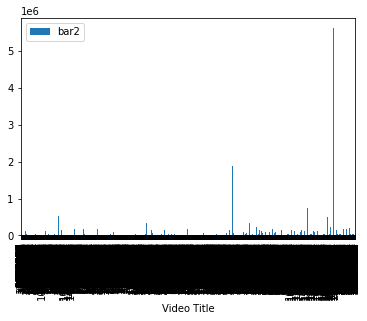

In [ ]:
import pandas as pd

df = pd.read_csv("USvideos.csv", encoding='utf-8')

df.groupby('category_id')
df.describe()

bar = pd.DataFrame()
bar['Video Title'] = df['views']
bar['bar2'] = df['likes']
bar.set_index('bar2')
bar.plot.bar('Video Title')
bar
